# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [2]:
!python -m pip install pyyaml==5.1
!python -m pip install torch torchvision torchaudio
!python -m pip install opencv-python
!python -m pip install scikit-image
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Using cached PyYAML-5.1-cp310-cp310-macosx_11_0_arm64.whl
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-events 0.6.3 requires pyyaml>=5.3, but you have pyyaml 5.1 which is incompatible.
fatal: destination path 'detectron2' already exists and is not an empty directory.
  Using cached pycocotools-2.0.6-cp310-cp310-macosx_11_0_arm64.whl
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
  Using cached iopath-0.1.9-py3-none-any.whl (27 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 

In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

%matplotlib inline
import matplotlib.pyplot as plt

zsh:1: command not found: nvcc
torch:  2.0 ; cuda:  2.0.0.dev20230228


AttributeError: module 'detectron2' has no attribute '__version__'

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on a custom dataset

# QFLOW 

In [5]:
# Double check this directory! Should be ./QuantumDotControl/autotuning/coarse_tuning/models/detectron2
ROOT_DIR = os.getcwd()
print(ROOT_DIR)

/Users/andrijapaurevic/Documents/uWaterloo/research/mainCSG/QuantumDotControl/autotuning/coarse_tuning/models/Detectron_MRCNN


In [5]:
# download
!wget -nc https://data.nist.gov/od/ds/66492819760D3FF6E05324570681BA721894/data_qflow_lite.zip

# if this doesnt work, just go and download it and place it in ROOT_DIR

--2023-06-12 13:08:55--  https://data.nist.gov/od/ds/66492819760D3FF6E05324570681BA721894/data_qflow_lite.zip
Resolving data.nist.gov (data.nist.gov)... 54.85.30.225
Connecting to data.nist.gov (data.nist.gov)|54.85.30.225|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://nist-oar-cache.s3.amazonaws.com/prd/gen1/66492819760D3FF6E05324570681BA721894/data_qflow_lite.zip [following]
--2023-06-12 13:08:57--  https://nist-oar-cache.s3.amazonaws.com/prd/gen1/66492819760D3FF6E05324570681BA721894/data_qflow_lite.zip
Resolving nist-oar-cache.s3.amazonaws.com (nist-oar-cache.s3.amazonaws.com)... 54.231.196.81, 3.5.28.130, 52.217.46.188, ...
Connecting to nist-oar-cache.s3.amazonaws.com (nist-oar-cache.s3.amazonaws.com)|54.231.196.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 913524076 (871M) [application/zip]
Saving to: ‘data_qflow_lite.zip’

data_qflow_lite.zip 100%[===================>] 871.20M  2.96MB/s    in 7m 33s  

2023-06-12 

In [6]:
# Decompress data
!unzip data_qflow_lite.zip 

Archive:  data_qflow_lite.zip
   creating: data_qflow_lite/
  inflating: __MACOSX/._data_qflow_lite  
  inflating: data_qflow_lite/20171118-132955511715.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-132955511715.npy  
  inflating: data_qflow_lite/20171118-133314176276.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-133314176276.npy  
  inflating: data_qflow_lite/20171118-123946293093.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-123946293093.npy  
  inflating: data_qflow_lite/20171118-124043491570.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-124043491570.npy  
  inflating: data_qflow_lite/20171118-130451901219.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-130451901219.npy  
  inflating: data_qflow_lite/20171118-131029545572.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-131029545572.npy  
  inflating: data_qflow_lite/20171118-124753204195.npy  
  inflating: __MACOSX/data_qflow_lite/._20171118-124753204195.npy  
  inflating: data_qflow

In [75]:
RAW_DATA_DIR = os.path.join(ROOT_DIR, "data_qflow_lite")
MODEL_DATA_DIR = os.path.join(ROOT_DIR, "csd")
MODEL_TRAIN_DATA_DIR = os.path.join(MODEL_DATA_DIR,"train")
MODEL_VAL_DATA_DIR = os.path.join(MODEL_DATA_DIR,"val")
os.mkdir(MODEL_DATA_DIR)
os.mkdir(MODEL_TRAIN_DATA_DIR)
os.mkdir(MODEL_VAL_DATA_DIR)

In [76]:
import os 
import skimage as sk
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# !python -m pip install alphashape
# !python -m pip install descartes

# import alphashape
# import matplotlib.pyplot as plt
# from descartes import PolygonPatch

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

class ProcessData():
    def __init__(self):
        self.vgg_format = {}

    def extract_csd(self, path_to_data, isTrain):
        qflow_data = np.load(path_to_data, allow_pickle=True).item()

        voltages = {"P1": qflow_data['V_P1_vec'], "P2": qflow_data['V_P2_vec']}
        dV = voltages["P1"][1] - voltages["P1"][0]

        N = len(voltages["P1"])
        M = len(voltages["P2"])
        
        assert N == M

        self.width, self.height = N,M
        self.fileID = os.path.basename(path_to_data).replace(".npy","")
        self.filename = self.fileID+".jpg"

        # Extract current, state regimes and gradient
        I = np.array([
             data['sensor'][1] for data in qflow_data['output']
        ]).reshape((N,N))

        grad = np.gradient(I, dV)
        dIdVP1, dIdVP2 = grad[0], grad[1]

        regimes = np.array([
            data['state'] for data in qflow_data['output']
        ]).reshape((N,N))

        def normalize(matrix):
            mean = matrix.mean()
            std = matrix.std()
            return (matrix - mean) / std

        I /= np.amax(I)

        SAVE_DIR = MODEL_TRAIN_DATA_DIR if isTrain else MODEL_VAL_DATA_DIR

        from PIL import Image
        im = Image.fromarray((255 * I).astype(np.uint8))
        SAVE_PATH = os.path.join(SAVE_DIR, '{}.jpg'.format(self.fileID))
        im.save(SAVE_PATH)

        csd = {"I": np.array(I,dtype=np.float32), "regimes": regimes}

        return csd
    
    def vgg_annotate_csd(self,csd):

        # First create a list of objects in the image
        object_list = []

        regimes = csd["regimes"]

        labelled_regimes = sk.measure.label(
            regimes, background = -1, connectivity = 1
        )
        
        # fig, ax = plt.subplots()

        # plt.imshow(labelled_regimes)
        # plt.show()

        regions = sk.measure.regionprops(labelled_regimes)
        regions_list = []

        for index in range(1, labelled_regimes.max()):
            region_dict = {}


            region_coords = regions[index].coords

            result={}

            for row in region_coords:
                key = row[0]
                value = row[1]
                if key not in result:
                    result[key] = [value, value]  # Initialize with the current value
                else:
                    result[key][0] = min(result[key][0], value)  # Update minimum value
                    result[key][1] = max(result[key][1], value)  # Update maximum value

            output = np.array([[key, minmax[0]] for key, minmax in result.items()] + [[key, minmax[1]] for key, minmax in result.items()])

            x,y= output.T
            skip=1
            px = x.tolist()[::skip]
            py = y.tolist()[::skip]

            regime = regimes[int(np.average(y)), int(np.average(x))]
            
            patches = []
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            poly = np.array(poly).reshape(-1,2)
            # poly = sk.measure.approximate_polygon(poly)
            def organize_array_clockwise(arr):
                # Calculate the centroid of the points
                centroid = np.mean(arr, axis=0)

                # Calculate the angle of each point with respect to the centroid
                angles = np.arctan2(arr[:, 1] - centroid[1], arr[:, 0] - centroid[0])

                # Sort the points based on the angles in clockwise order
                indices = np.argsort(angles)
                sorted_arr = arr[indices]

                return sorted_arr


            poly = organize_array_clockwise(poly)
            # print(poly)
            patches.append(matplotlib.patches.Polygon(poly))
            p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
            colors = 100*np.random.rand(len(patches))
            p.set_array(np.array(colors))
            # ax.add_collection(p)
            # ax.autoscale_view()
            # plt.scatter(px,py)
            # plt.xlim(0,100)
            # plt.ylim(0,100)
            
            region_dict["shape_name"] = "polygon"
            region_dict["all_points_x"] = [row[0] for row in poly]
            region_dict["all_points_y"] = [row[1] for row in poly]

            # return
            if len(x.tolist()) <= 2 or len(y.tolist()) <=2:
                print("Ignoring polygon from", self.filename, len(x.tolist()), len(y.tolist()), " because their polygons too small for detectron2")
                continue
            region_dict["class"] = regime

            regions_list.append(region_dict)
        # plt.show()
        # return

        object = {}
        object["filename"] = self.filename
        object["size"] = self.width * self.height
        object["regions"] = regions_list

        object_list.append(object)

        # Now create the VGG format
        
        for object in object_list:
             
            filename = object["filename"]
            size = object["size"]
            regions = object["regions"]

            self.vgg_format[self.fileID] = {}
            self.vgg_format[self.fileID]["filename"] = filename
            self.vgg_format[self.fileID]["size"] = size
            self.vgg_format[self.fileID]["regions"] = {}

            index = 0

            for region in regions:
                region_dict = {}
                shape_attributes = {}

                shape_attributes["name"] = region["shape_name"]
                shape_attributes["all_points_x"] = region["all_points_x"]
                shape_attributes["all_points_y"] = region["all_points_y"]

                region_dict["shape_attributes"] = shape_attributes
                region_dict["region_attributes"] = {"label": region["class"]}

                self.vgg_format[self.fileID]["regions"][str(index)] = region_dict

                index += 1

        self.vgg_format[self.fileID]["file_attributes"] = {}
        return 0 

    def dump_json(self,train_val_split, dataset_size, save_folder):
            num_of_train = int(train_val_split * dataset_size)
            keys, values = zip(*self.vgg_format.items())
            vgg_format_train = dict(zip(keys[:num_of_train], values[:num_of_train]))
            vgg_format_val = dict(zip(keys[num_of_train:], values[num_of_train:]))

            with open(save_folder+"/train/via_region_data.json", "w") as f:
                json.dump(vgg_format_train, f, cls=NumpyEncoder)
            with open(save_folder+"/val/via_region_data.json", "w") as f:
                json.dump(vgg_format_val, f, cls=NumpyEncoder)


ProcessData = ProcessData()
datapath = RAW_DATA_DIR
save_dir = MODEL_DATA_DIR
dataset_size = 1000
train_val_split = 0.95
counter = 0
dataset = []
for filename in os.listdir(datapath):
      if filename.endswith(".npy"):
        if counter == dataset_size: 
            break

        csd = ProcessData.extract_csd(os.path.join(datapath,filename), isTrain=True if counter < dataset_size * (train_val_split) else False)
        result = ProcessData.vgg_annotate_csd(csd)
        counter += 1 

        dataset.append(csd)



ProcessData.dump_json(train_val_split, dataset_size, save_dir)

Ignoring polygon from 20171118-124043491570.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-131029545572.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-124645305488.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-133403683301.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-132211254586.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-130226680182.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-133058030715.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-133058030715.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-133844691242.jpg 2 2  because their polygons too small for detectron2
Ignoring polygon from 20171118-134048401828.jpg 2 2  because their polygons too small for d

In [77]:
from detectron2.structures import BoxMode
def get_csd_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = 100, 100
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            regions = anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]

            
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": int(regions["label"]),
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

DatasetCatalog.clear()
MetadataCatalog.clear()

for d in ["train", "val"]:
    DatasetCatalog.register("csd_" + d, lambda d=d: get_csd_dicts("csd/" + d))
    MetadataCatalog.get("csd_" + d).set(thing_classes=["0","1","2"])
    MetadataCatalog.get("csd_" + d).set(thing_colors=[(255,0,0),(0,255,0),(0,0,255)])
csd_metadata = MetadataCatalog.get("csd_train")

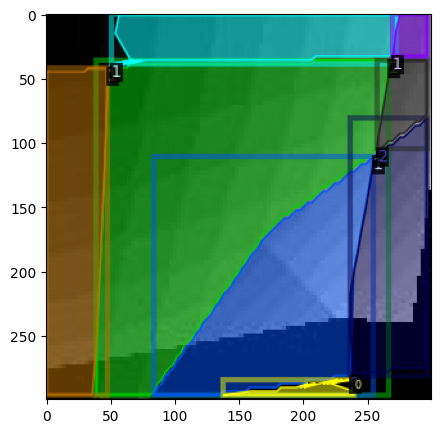

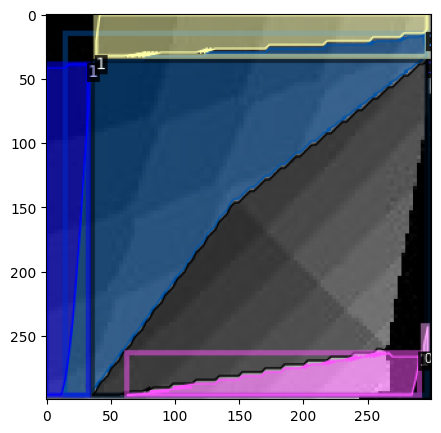

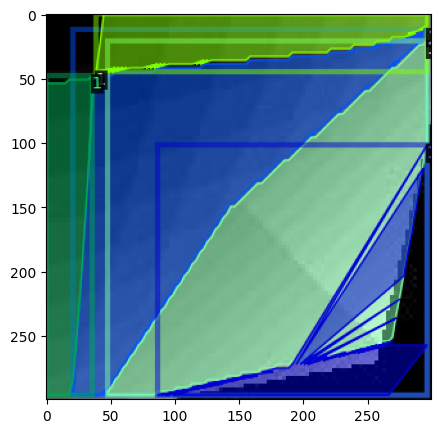

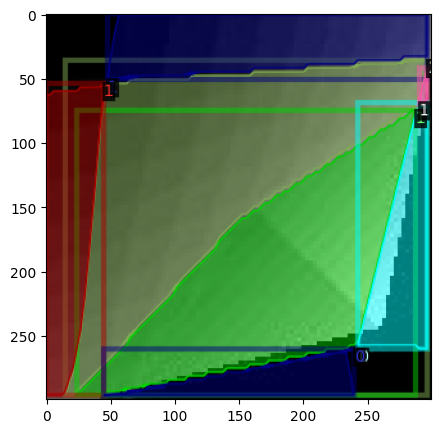

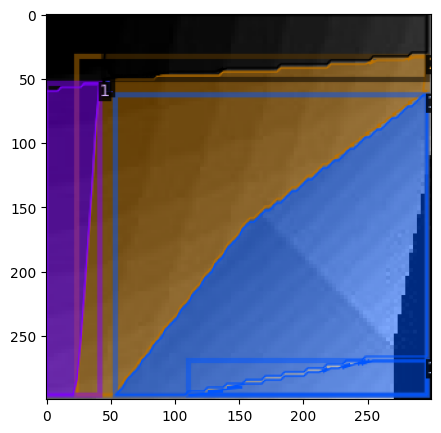

In [78]:
dataset_dicts = get_csd_dicts("csd/train")
# print(dataset_dicts)
# from detectron2.utils.visualizer import Visualizer
from PIL import Image
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import matplotlib.cm as cm
from matplotlib.pyplot import subplots
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=csd_metadata, scale=3) #
    out = visualizer.draw_dataset_dict(d)
    fig, ax = subplots(figsize=(5, 5))
    ax.imshow(out.get_image()[:,:,::-1])

    # plt.imshow()
    # plt.show()

In [8]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("csd_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.DEVICE = "cpu"

cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 5  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300 # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

In [177]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_charge_sensor_5000.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[06/14 18:13:32 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_charge_sensor_5000.pth ...
[Checkpointer] Loading from ./output/model_charge_sensor_5000.pth ...


(401, 401)
locator: <matplotlib.ticker.AutoLocator object at 0x28cf2f8e0>


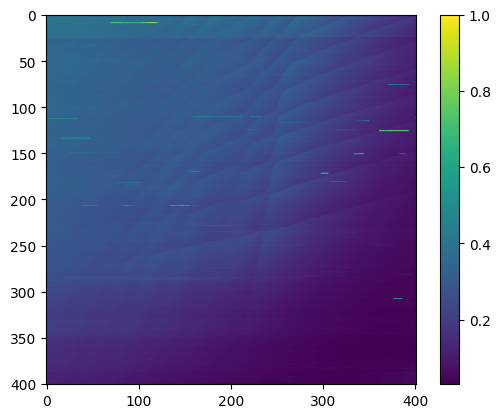

locator: <matplotlib.ticker.AutoLocator object at 0x28ceca560>


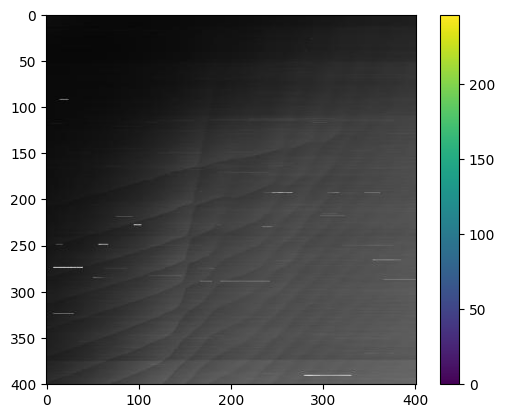

All masks are false?:  False


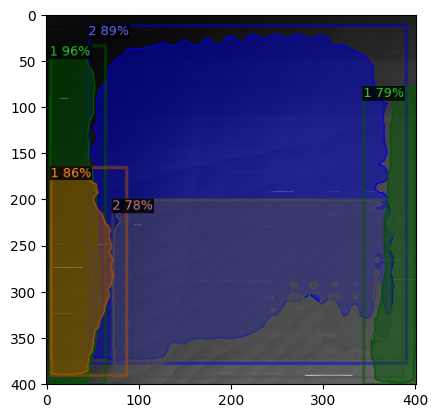

In [181]:
# Experimental attempt

filename= "/Users/andrijapaurevic/Documents/uWaterloo/research/mainCSG/QuantumDotControl/data_qflow_v2/experimental/exp_large/exp_large_02.npy"
# filename = "./data_qflow_lite/20171118-123151236063.npy"
qflow_data = np.load(filename, allow_pickle=True).item()
exp = True
voltages = {"P1": qflow_data['x' if exp else 'V_P1_vec'], "P2": qflow_data['y' if exp else 'V_P2_vec']}
dV = voltages["P1"][1] - voltages["P1"][0]

N = len(voltages["P1"])
M = len(voltages["P2"])

assert N == M

width, height = N,M
fileID = os.path.basename(filename).replace(".npy","")
filename = fileID+".jpg"

# Extract current, state regimes and gradient 
# if exp else data['sensor'][1] for data in qflow_data['output']
print(qflow_data['sensor'].shape)
I = np.array([
    qflow_data['sensor']
]).reshape((N,N))


if not(exp):
    regimes = np.array([
        qflow_data['sensor'] if exp else data['state'] for data in qflow_data['output']
    ]).reshape((N,N))
    plt.imshow(regimes)
    plt.show()

grad = np.gradient(I, dV)
dIdVP1, dIdVP2 = grad[0], grad[1]

def normalize(matrix):
    mean = matrix.mean()
    std = matrix.std()
    return (matrix - mean) / std

# I = dIdVP2
I = I / np.amax(I)
plt.imshow(I)
plt.colorbar()
plt.show()

from PIL import Image
im = Image.fromarray((255 * I).astype(np.uint8))

SAVE_PATH = os.path.join(ROOT_DIR, '{}.jpeg'.format(fileID))
im.save(SAVE_PATH)

im = cv2.imread(SAVE_PATH)
im = cv2.rotate(im, cv2.ROTATE_180)
plt.imshow(im)
plt.colorbar()
plt.show()
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

v = Visualizer(im[:, :, ::-1],
                metadata=csd_metadata, 
                scale=1,    # remove the colors of unsegmented pixels. This option is only available for segmentation models
)

print("All masks are false?: ", np.all(outputs["instances"].pred_masks.numpy()==False))

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.show()


locator: <matplotlib.ticker.AutoLocator object at 0x28b559ab0>


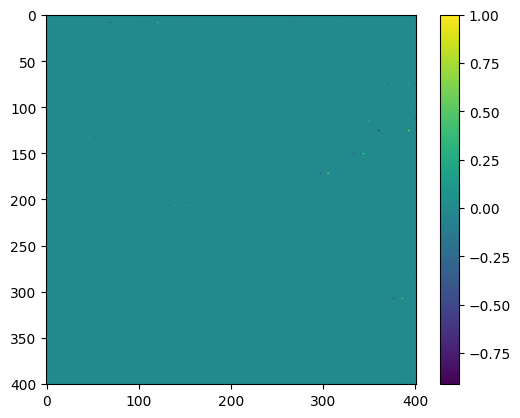

locator: <matplotlib.ticker.AutoLocator object at 0x28b65b8e0>


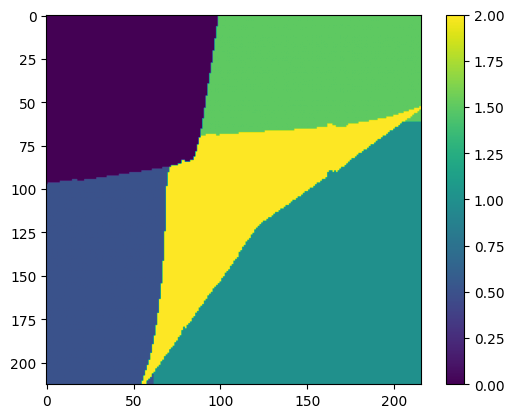

locator: <matplotlib.ticker.AutoLocator object at 0x28e7e3220>


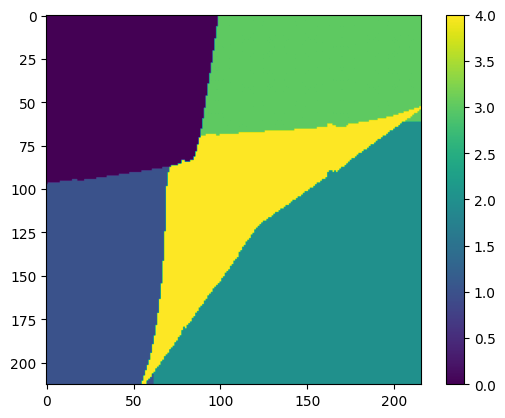

4


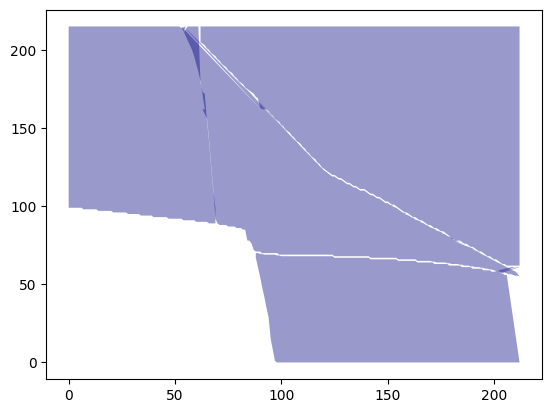

All masks are false?:  True


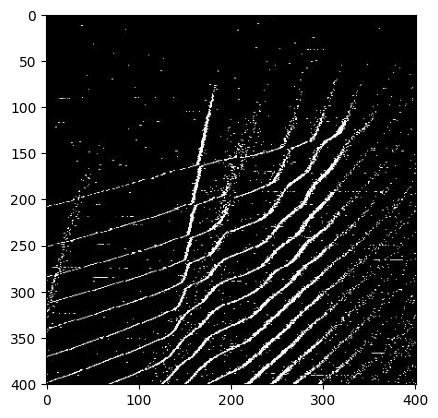

In [250]:
# Noisy simulated attempt
import h5py

filename= "/Users/andrijapaurevic/Documents/uWaterloo/research/mainCSG/QuantumDotControl/data_qflow_v2/simulated/sim_normal/normal_1.5m_0.5std_noisy_data_0.hdf5"
# filename = "./data_qflow_lite/20171118-123151236063.npy"
with h5py.File(filename, "r") as f:
    
    d = [n for n in f.keys()]
    qflow_data = f[d[0]]

    voltages = {"P1": np.array(qflow_data['V_P1_vec']), "P2": np.array(qflow_data['V_P2_vec'])}
    dV = voltages["P1"][1] - voltages["P1"][0]

    N = len(voltages["P1"])
    M = len(voltages["P2"])
    # print(N,M)

    # assert N == M

    width, height = N,M
    fileID = os.path.basename(filename).replace(".npy","")
    filename = fileID+".jpg"

    I = np.array([
       qflow_data['output']['sensor']
    ]).reshape((N,M))

    I = dIdVP2
    I = I / np.amax(I)
    plt.imshow(I)
    plt.colorbar()
    plt.show()
    
    from PIL import Image
    im = Image.fromarray((255 * I).astype(np.uint8))

    SAVE_PATH = os.path.join(ROOT_DIR, '{}.jpeg'.format(fileID))
    im.save(SAVE_PATH)
    # plt.imshow(im)
    # plt.colorbar()
    # plt.show()
    plt.imshow(qflow_data['output']['state'])
    plt.colorbar()
    plt.show()
    
    contours_DQD = sk.measure.find_contours(np.array(qflow_data['output']['state']), 1.5)
    contours_LSQD = sk.measure.find_contours(np.array(qflow_data['output']['state']), 1.25)
    contours_RSQD = sk.measure.find_contours(np.array(qflow_data['output']['state']), 0.75)
    contours_SQD = sk.measure.find_contours(np.array(qflow_data['output']['state']), 0.25)
    contours_NQD = sk.measure.find_contours(np.array(qflow_data['output']['state']), 0)

    regimes = np.array(qflow_data['output']['state'])
    labelled_regimes = sk.measure.label(
           qflow_data['output']['state'], background=0
    )
    
    plt.imshow((2 * np.array(qflow_data['output']['state'])).astype(np.uint8))
    plt.colorbar()
    plt.show()
    regions = sk.measure.regionprops((2 * np.array(qflow_data['output']['state'])).astype(np.uint8))
    print(len(regions))
    fig, ax = plt.subplots()

    for index in range(len(regions)):
            region_dict = {}


            region_coords = regions[index].coords

            result={}

            for row in region_coords:
                key = row[0]
                value = row[1]
                if key not in result:
                    result[key] = [value, value]  # Initialize with the current value
                else:
                    result[key][0] = min(result[key][0], value)  # Update minimum value
                    result[key][1] = max(result[key][1], value)  # Update maximum value

            output = np.array([[key, minmax[0]] for key, minmax in result.items()] + [[key, minmax[1]] for key, minmax in result.items()])

            x,y= output.T
            # plt.scatter(x,y)
            # plt.show()
            skip=1
            px = x.tolist()[::skip]
            py = y.tolist()[::skip]

            regime = regimes[int(np.average(y)), int(np.average(x))]
            
            patches = []
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            poly = np.array(poly).reshape(-1,2)
            # poly = sk.measure.approximate_polygon(poly)
            def organize_array_clockwise(arr):
                # Calculate the centroid of the points
                centroid = np.mean(arr, axis=0)

                # Calculate the angle of each point with respect to the centroid
                angles = np.arctan2(arr[:, 1] - centroid[1], arr[:, 0] - centroid[0])

                # Sort the points based on the angles in clockwise order
                indices = np.argsort(angles)
                sorted_arr = arr[indices]

                return sorted_arr


            poly = organize_array_clockwise(poly)
            # print(poly)
            patches.append(matplotlib.patches.Polygon(poly))
            p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
            colors = 100*np.random.rand(len(patches))
            p.set_array(np.array(colors))
            ax.add_collection(p)
            ax.autoscale_view()

         
            # region_dict["shape_name"] = "polygon"
            # region_dict["all_points_x"] = [row[0] for row in poly]
            # region_dict["all_points_y"] = [row[1] for row in poly]

            # # return
            # if len(x.tolist()) <= 2 or len(y.tolist()) <=2:
            #     print("Ignoring polygon from", filename, len(x.tolist()), len(y.tolist()), " because their polygons too small for detectron2")
            #     continue
            # region_dict["class"] = regime

            # regions_l/ist.append(region_dict)
        # plt.show()
        # return
    
    # fig, ax = plt.subplots()

    # plt.imshow(labelled_regimes)
    # plt.colorbar()
    plt.show()
im = cv2.imread(SAVE_PATH)
im = cv2.rotate(im, cv2.ROTATE_180)

outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

v = Visualizer(im[:, :, ::-1],
                metadata=csd_metadata, 
                scale=1,    # remove the colors of unsegmented pixels. This option is only available for segmentation models
)

print("All masks are false?: ", np.all(outputs["instances"].pred_masks.numpy()==False))

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.show()


All masks are false?:  False


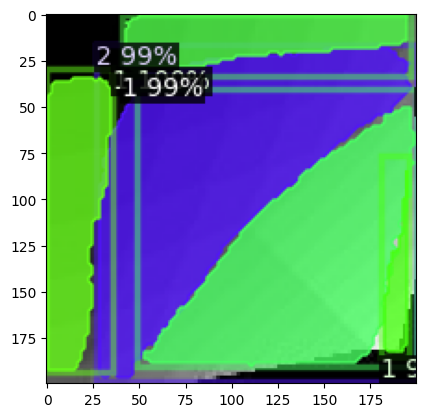

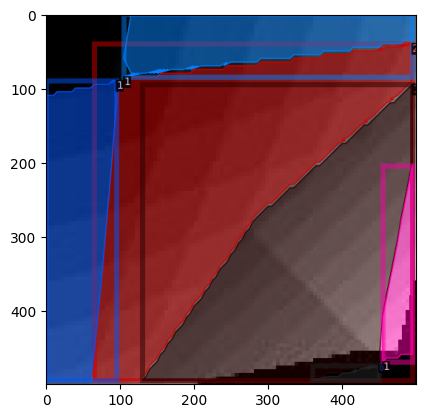

In [116]:

from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_csd_dicts("csd/val")
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    v = Visualizer(im[:, :, ::-1],
                   metadata=csd_metadata, 
                   scale=2,    # remove the colors of unsegmented pixels. This option is only available for segmentation models
                   instance_mode=ColorMode.SEGMENTATION   # remove the colors of unsegmented pixels
    )
    
    print("All masks are false?: ", np.all(outputs["instances"].pred_masks.numpy()==False))


    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image())
    plt.show()
    
    plt.cla()
    plt.clf()
    plt.close()
    visualizer = Visualizer(im[:, :, ::-1], metadata=csd_metadata, scale=5)
    out = visualizer.draw_dataset_dict(d)
    plt.imshow(out.get_image()[:, :, ::-1],cmap=cm.summer)
    plt.show()


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("csd_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "csd_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[06/06 17:29:12 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[06/06 17:29:12 d2.evaluation.coco_evaluation]: Trying to convert 'csd_val' to COCO format ...
[06/06 17:29:12 d2.data.datasets.coco]: Converting annotations of dataset 'csd_val' to COCO format ...)
[06/06 17:29:12 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[06/06 17:29:12 d2.data.datasets.coco]: Conversion finished, #images: 2, #annotations: 12
[06/06 17:29:12 d2.data.datasets.coco]: Caching COCO format annotations at './output/csd_val_coco_format.json' ...
[06/06 17:29:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/06 17:29:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/06 17:29:12 d2.data.common]: Serializing 2 elements to byte tensors and concatenating them all ...
[